In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/cement_slump.csv")

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,103.0,229.894175,78.877230,137.00,152.00,248.00,303.900,374.00
Slag,103.0,77.973786,60.461363,0.00,0.05,100.00,125.000,193.00
Fly ash,103.0,149.014563,85.418080,0.00,115.50,164.00,235.950,260.00
Water,103.0,197.167961,20.208158,160.00,180.00,196.00,209.500,240.00
SP,103.0,8.539806,2.807530,4.40,6.00,8.00,10.000,19.00
Coarse Aggr.,103.0,883.978641,88.391393,708.00,819.50,879.00,952.800,1049.90
Fine Aggr.,103.0,739.604854,63.342117,640.60,684.50,742.70,788.000,902.00
SLUMP(cm),103.0,18.048544,8.750844,0.00,14.50,21.50,24.000,29.00
FLOW(cm),103.0,49.610680,17.568610,20.00,38.50,54.00,63.750,78.00
Compressive Strength (28-day)(Mpa),103.0,36.038738,7.837120,17.19,30.90,35.52,41.205,58.53


<Axes: >

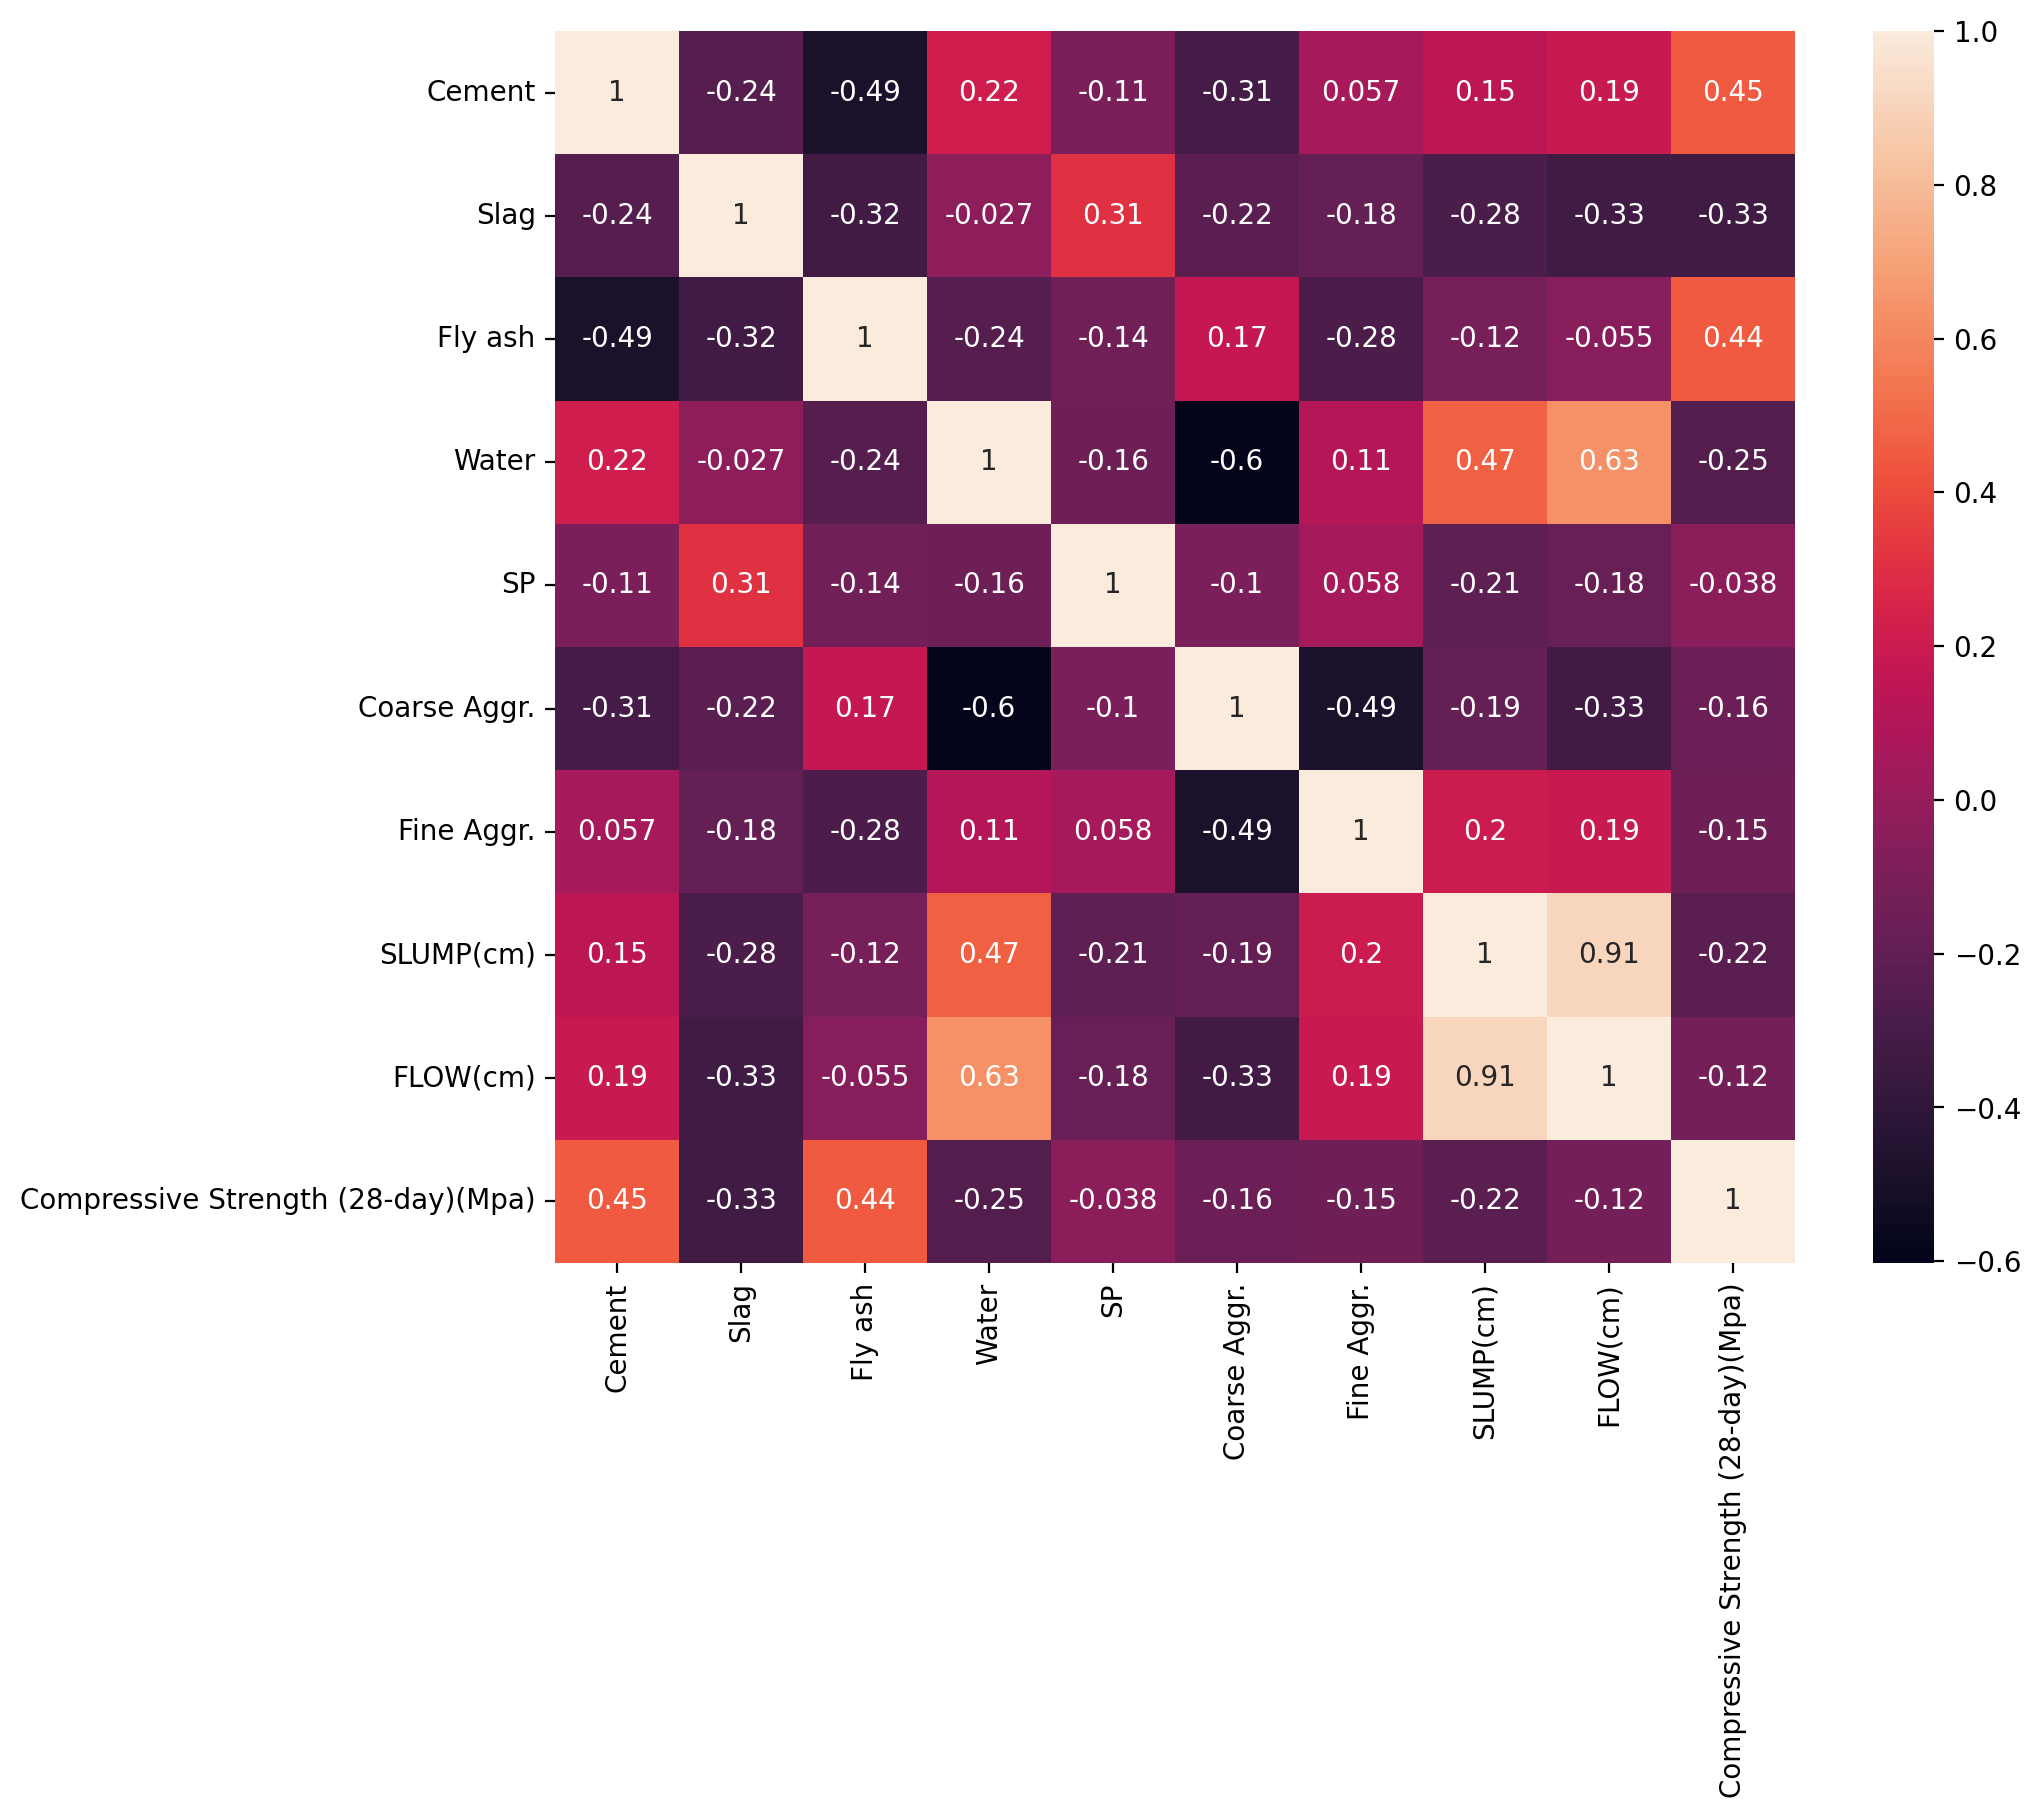

In [6]:
plt.figure(figsize=(10, 8), dpi=200)
sns.heatmap(df.corr(), annot=True)

In [13]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis=1)
y = df["Compressive Strength (28-day)(Mpa)"]

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [19]:
from sklearn.svm import SVR, LinearSVR

In [21]:
# help(SVR)

In [38]:
# Using defualt parameters

In [22]:
base_model = SVR()

In [23]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [24]:
base_pred = base_model.predict(scaled_X_test)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
mean_absolute_error(y_test, base_pred)

5.236902091259179

In [27]:
np.sqrt(mean_squared_error(y_test, base_pred))

6.695914838327133

In [28]:
# Doing a Grid Search for optimal parameters

In [29]:
param_grid = {"C": [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2],
             "kernel": ["linear", "sigmoid", "poly", "rbf"],
             "gamma": ["scale", "auto"],
             "degree": [2, 3, 4],
             "epsilon": [0, 0.01, 0.1, 0.5, 1, 2, 3]}

In [31]:
svr = SVR()

In [32]:
grid = GridSearchCV(svr, param_grid)

In [33]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2],
                         'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'sigmoid', 'poly', 'rbf']})

In [34]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [35]:
grid_pred = grid.predict(scaled_X_test)

In [36]:
mean_absolute_error(y_test, grid_pred)

2.512801221076198

In [37]:
np.sqrt(mean_squared_error(y_test, grid_pred))

3.1782103051198347